In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("train.xlsx")

In [3]:
# 4% of data
df.shape[0],df.shape[0]*0.04

(6019, 240.76)

In [4]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [6]:
print("3% of data is :",df.shape[0]*0.03)
df.isnull().sum()

3% of data is : 180.57


Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
df.shape

(5975, 11)

In [12]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

# handling  Feature and encoding based on frequency

In [19]:
def encoding(df,data):
    a=df[data].value_counts().to_dict()
    fq = df.groupby(data).size()/len(df) 
    df[data] = df[data].map(fq) 
    b=df[data].value_counts().to_dict()
    encode=dict(zip(a,b))    
    return encode

In [20]:
encoding(df,'Location')
encoding(df,'Fuel_Type')
encoding(df,'Transmission')
encoding(df,'Owner_Type')

{'First': 0.8205857740585774,
 'Second': 0.1594979079497908,
 'Third': 0.018577405857740585,
 'Fourth & Above': 0.0013389121338912135}

## Converting catagoriacal feature with strint to float

In [21]:
def cat_flot(df,data):
    df[data]=df[data].astype(str).str.extract('(\d+)').astype(float)
    return df

In [22]:
cat_flot(df,'Mileage')
cat_flot(df,'Engine')
cat_flot(df,'Power')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0.131213,2010,72000,0.009372,0.713975,0.820586,26.0,998.0,58.0,5.0,1.75
1,0.102594,2015,41000,0.534728,0.713975,0.820586,19.0,1582.0,126.0,5.0,12.50
2,0.082008,2011,46000,0.454226,0.713975,0.820586,18.0,1199.0,88.0,5.0,4.50
3,0.082008,2012,87000,0.534728,0.713975,0.820586,20.0,1248.0,88.0,7.0,6.00
4,0.106109,2013,40670,0.534728,0.286025,0.159498,15.0,1968.0,140.0,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,0.091883,2014,27365,0.534728,0.713975,0.820586,28.0,1248.0,74.0,5.0,4.75
6015,0.068619,2015,100000,0.534728,0.713975,0.820586,24.0,1120.0,71.0,5.0,4.00
6016,0.068619,2012,55000,0.534728,0.713975,0.159498,14.0,2498.0,112.0,8.0,2.90
6017,0.088703,2013,46000,0.454226,0.713975,0.820586,18.0,998.0,67.0,5.0,2.65


In [23]:
df.dropna(inplace=True,axis=0)

In [24]:
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [25]:
df.shape

(5872, 11)

In [26]:
# identifing x and y variables 
x=df.drop(['Price'],axis=1)

In [27]:
y=df['Price']

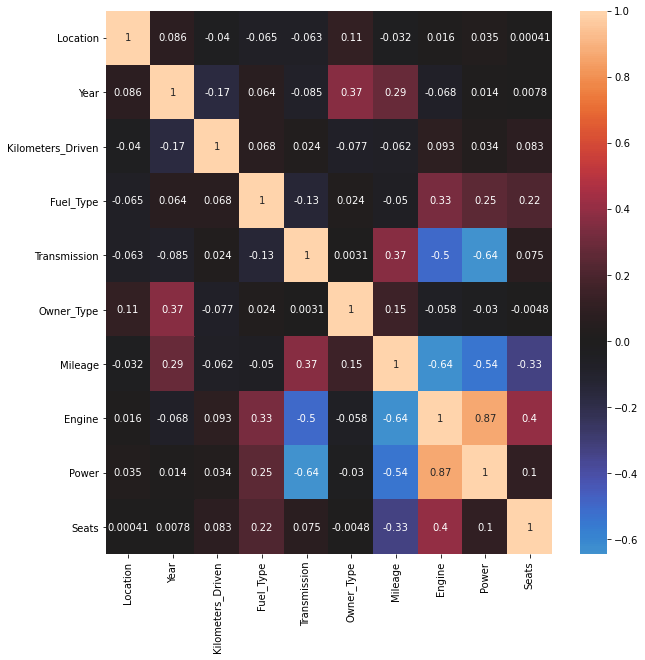

In [28]:
fig,ax1=plt.subplots(figsize=(10,10))
sns.heatmap(x.corr(),center=0,annot=True)

In [29]:
# 5% of data after handling object type data
0.05*df.shape[0]

293.6

In [30]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
iqr=Q3-Q1
((df < (Q1 - 2.5 * iqr)) | (df > (Q3 + 2.5 * iqr))).sum()

Location                0
Year                   13
Kilometers_Driven      64
Fuel_Type              65
Transmission            0
Owner_Type           1033
Mileage                 0
Engine                 28
Power                  59
Seats                 953
Price                 459
dtype: int64

In [31]:
df.describe()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5872.000000,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,0.098772,2013.477691,5.831700e+04,0.492501,0.589934,0.701675,17.849796,1625.745572,112.961853,5.283719,9.603919
std,0.023821,3.164568,9.216941e+04,0.064937,0.194174,0.258032,4.375212,601.641783,53.924304,0.805081,11.249453
min,0.037322,1998.000000,1.710000e+02,0.001674,0.286025,0.001339,0.000000,624.000000,34.000000,2.000000,0.440000
25%,0.088703,2012.000000,3.342250e+04,0.454226,0.286025,0.820586,15.000000,1198.000000,75.000000,5.000000,3.517500
50%,0.102594,2014.000000,5.260900e+04,0.534728,0.713975,0.820586,18.000000,1495.500000,97.000000,5.000000,5.750000
75%,0.124017,2016.000000,7.240275e+04,0.534728,0.713975,0.820586,21.000000,1991.000000,138.000000,5.000000,10.000000
max,0.131213,2019.000000,6.500000e+06,0.534728,0.713975,0.820586,33.000000,5998.000000,560.000000,10.000000,160.000000


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Cross validation
from sklearn.model_selection import cross_val_score

#hyper parammeter tuening libs
from  sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#split and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [40]:
# User define function
def built_model(model,model_name,X=xtrain,Y=ytrain):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(model_name)
    print("Model Accuracy : ",r2_score(ytest,ypred))
    print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)),'\n')
    

In [41]:
built_model(dt,"Decision Tree")
built_model(rf,"Random Forest")
built_model(adb,"Adaboost ")
built_model(gb,"GBoost")
built_model(xgb,"XGBoost")

Decision Tree
Model Accuracy :  0.7602269137804546
RMSE : 5.4148312822268965 

Random Forest
Model Accuracy :  0.9146505965916334
RMSE : 3.230613157019881 

Adaboost 
Model Accuracy :  0.6920066597312329
RMSE : 6.136989433248193 

GBoost
Model Accuracy :  0.9137604167463528
RMSE : 3.2474168302771993 

XGBoost
Model Accuracy :  0.9294808385834084
RMSE : 2.936555965855751 

